## 1) Import and analyze data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('secom.data',sep=' ',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [3]:
labels = pd.read_csv('secom_labels.data',sep=' ',header=None)
labels.columns = ['Class','Time']
target = labels['Class']

In [4]:
from collections import Counter
Counter(labels['Class'])

Counter({-1: 1463, 1: 104})

In [5]:
data.isna().sum()

0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 590, dtype: int64

In [6]:
data.fillna(data.mean(),inplace=True)

In [7]:
data.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
585    0
586    0
587    0
588    0
589    0
Length: 590, dtype: int64

## 2) TPOT

In [8]:
%pip install tpot
from tpot import TPOTClassifier

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [9]:
data

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,...,0.005396,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,...,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,...,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,...,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,...,0.005396,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,0.004700,203.172000,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,0.005396,97.934373,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,-0.000841,...,0.002500,43.523100,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,0.007500,93.494100,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100


In [59]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=7,shuffle=True)

model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='f1_weighted',verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(data,target)
# export the best model
model.export('tpot_secom_best.py')

C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
Version 0.11.5 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: 0.9106825452925345
Generation 2 - Current best internal CV score: 0.9106825452925345
Generation 3 - Current best internal CV score: 0.9106825452925345
Generation 4 - Current best internal CV score: 0.9106825452925345
Generation 5 - Current best internal CV score: 0.9106825452925345
Best pipeline: ExtraTreesClassifier(ExtraTreesClassifier(RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.3, min_samples_leaf=17, min_samples_split=12, n_estimators=100), bootstrap=True, criterion=entropy, max_features=0.4, min_samples_leaf=19, min_samples_split=20, n_estimators=100), bootstrap=True, criterion=gini, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100)


In [8]:
from sklearn.model_selection import train_test_split

training_features, testing_features, training_target, testing_target = train_test_split(data,target,train_size=0.7)

In [48]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# Average CV score on the training set was: 0.9106825452925345
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.3, min_samples_leaf=17, min_samples_split=12, n_estimators=100)),
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.4, min_samples_leaf=19, min_samples_split=20, n_estimators=100)),
    ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [49]:
from sklearn.metrics import f1_score
f1_score(results,testing_target)

0.1

In [50]:
f1_score(results,testing_target,average='weighted')

0.9381756041069386

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(results,testing_target,labels=[-1,1])

array([[433,  26],
       [ 10,   2]], dtype=int64)

## 3) Dissatisfactory TPOT performance - what about GridSearchCV that considers imbalance?

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_validate

import xgboost
from xgboost import XGBClassifier, plot_importance
xgb = XGBClassifier()


C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/

In [65]:
xgb_params = {'reg_alpha': [10], 
            'reg_lambda': [0.1],
              'learning_rate': [0.001,0.01,0.1],
            'scale_pos_weight':[40,60]}

cv = StratifiedKFold(n_splits=9,shuffle=True)

gsXGB = GridSearchCV(xgb, xgb_params, cv = cv, scoring='f1', 
                     refit=True, n_jobs=5,return_train_score=True)
gsXGB.fit(data,target)

XGB_best = gsXGB.best_estimator_

gsXGB.best_score_

0.24885183191396162

In [66]:
cross_validate(XGB_best,data,target,scoring='f1',cv=cv,n_jobs=5,return_train_score=True)

{'fit_time': array([21.08490181, 21.73392749, 21.43790221, 21.79892635, 22.37792516,
        19.65493703, 19.04094005, 19.10092878, 18.85493827]),
 'score_time': array([0.02199745, 0.01999784, 0.03099918, 0.0289979 , 0.02899981,
        0.02400279, 0.02000308, 0.01600242, 0.0230031 ]),
 'test_score': array([0.22641509, 0.04651163, 0.26415094, 0.21875   , 0.18867925,
        0.31818182, 0.28571429, 0.14705882, 0.33333333]),
 'train_score': array([0.44337349, 0.46616541, 0.47208122, 0.43867925, 0.52840909,
        0.4972973 , 0.44660194, 0.44987775, 0.42592593])}

In [62]:
XGB_best

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=10,
              reg_lambda=0.1, scale_pos_weight=40, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
XGB_best.fit(training_features, training_target)
results = XGB_best.predict(testing_features)


In [ ]:
from sklearn.metrics import f1_score
f1_score(results,testing_target,average='weighted')

In [ ]:
f1_score(results,testing_target)

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(results,testing_target)

0.8774678111587982

## 3) What about GridSearchCV that considers imbalance that incorporates Feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
# configure to select all features
fs = SelectKBest(score_func=f_classif, k=40)
# learn relationship from training data
fs.fit(training_features,training_target)
# transform train input data
X_train_fs = fs.transform(training_features)
# # transform test input data
# X_test_fs = fs.transform(X_test)

C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  5  13  42  49  52  69  97 141 149 178 179 186 189 190 191 192 193 194
 226 229 230 231 232 233 234 235 236 237 240 241 242 243 256 257 258 259
 260 261 262 263 264 265 266 276 284 313 314 315 322 325 326 327 328 329
 330 364 369 370 371 372 373 374 375 378 379 380 381 394 395 396 397 398
 399 400 401 402 403 404 414 422 449 450 451 458 461 462 463 464 465 466
 481 498 501 502 503 504 505 506 507 508 509 512 513 514 515 528 529 530
 531 532 533 534 535 536 537 538] are constant.
  UserWarning)
C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


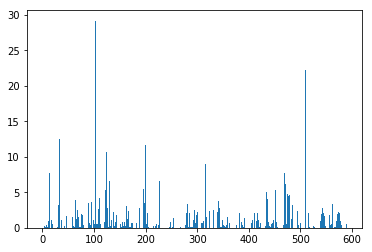

In [31]:
from matplotlib import pyplot
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [42]:
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=40)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [43]:
X_train_fs, X_test_fs, fs = select_features(training_features, training_target, testing_features)



C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  5  13  42  49  52  69  97 141 149 178 179 186 189 190 191 192 193 194
 226 229 230 231 232 233 234 235 236 237 240 241 242 243 256 257 258 259
 260 261 262 263 264 265 266 276 284 313 314 315 322 325 326 327 328 329
 330 364 369 370 371 372 373 374 375 378 379 380 381 394 395 396 397 398
 399 400 401 402 403 404 414 422 449 450 451 458 461 462 463 464 465 466
 481 498 501 502 503 504 505 506 507 508 509 512 513 514 515 528 529 530
 531 532 533 534 535 536 537 538] are constant.
  UserWarning)
C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [44]:
xgb_params = {'reg_alpha': [0.1,1,10], 
            'reg_lambda': [0.1,1,10],
            'scale_pos_weight':[7,20,40]}

cv = StratifiedKFold(n_splits=9,shuffle=True)

gsXGB = GridSearchCV(xgb, xgb_params, cv = cv, scoring='f1_weighted', 
                     refit=True, n_jobs=5,return_train_score=True)
gsXGB.fit(X_train_fs, training_target)

XGB_best_feat_sel = gsXGB.best_estimator_

gsXGB.best_score_

0.90682217339955

In [46]:
yhat = XGB_best_feat_sel.predict(X_test_fs)
# evaluate predictions
from sklearn.metrics import f1_score
f1_score(testing_target, yhat,average="weighted")

0.915685455156862

In [47]:
def select_feat(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=4)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_feat(training_features, training_target, testing_features)

xgb_params = {'reg_alpha': [0.1,1,10], 
            'reg_lambda': [0.1,1,10],
            'scale_pos_weight':[7,20,40]}

cv = StratifiedKFold(n_splits=9,shuffle=True)

gsXGB = GridSearchCV(xgb, xgb_params, cv = cv, scoring='f1_weighted', 
                     refit=True, n_jobs=5,return_train_score=True)
gsXGB.fit(X_train_fs, training_target)

XGB_best_feats = gsXGB.best_estimator_

gsXGB.best_score_

yhat = XGB_best_feats.predict(X_test_fs)
# evaluate predictions
from sklearn.metrics import f1_score
f1_score(testing_target, yhat,average="weighted")



C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  5  13  42  49  52  69  97 141 149 178 179 186 189 190 191 192 193 194
 226 229 230 231 232 233 234 235 236 237 240 241 242 243 256 257 258 259
 260 261 262 263 264 265 266 276 284 313 314 315 322 325 326 327 328 329
 330 364 369 370 371 372 373 374 375 378 379 380 381 394 395 396 397 398
 399 400 401 402 403 404 414 422 449 450 451 458 461 462 463 464 465 466
 481 498 501 502 503 504 505 506 507 508 509 512 513 514 515 528 529 530
 531 532 533 534 535 536 537 538] are constant.
  UserWarning)
C:\Users\ver2bj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.9140160341962423